In [55]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from collections import Counter

%matplotlib inline
sns.set(rc={"figure.figsize": (13, 10)})

In [ ]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/training_mush.csv")

In [ ]:
X = data.drop(columns="class")
y = data["class"]

In [ ]:
params = {
    "n_estimators": range(10, 51, 10),
    "max_depth": range(1, 12, 2),
    "min_samples_leaf": range(1, 8),
    "min_samples_split": range(2, 10, 2)
}

In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
grid_search_cv = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1, verbose=3)
grid_search_cv.fit(X, y)

In [ ]:
rf = grid_search_cv.best_estimator_
rf

In [ ]:

imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
None

In [32]:
X_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/testing_mush.csv")
y_true = pd.read_csv(r"D:\Projects\PythonProjects\DS-Rush\data\testing_y_mush.csv")


In [33]:
y_pred = rf.predict(X_test)

<AxesSubplot:>

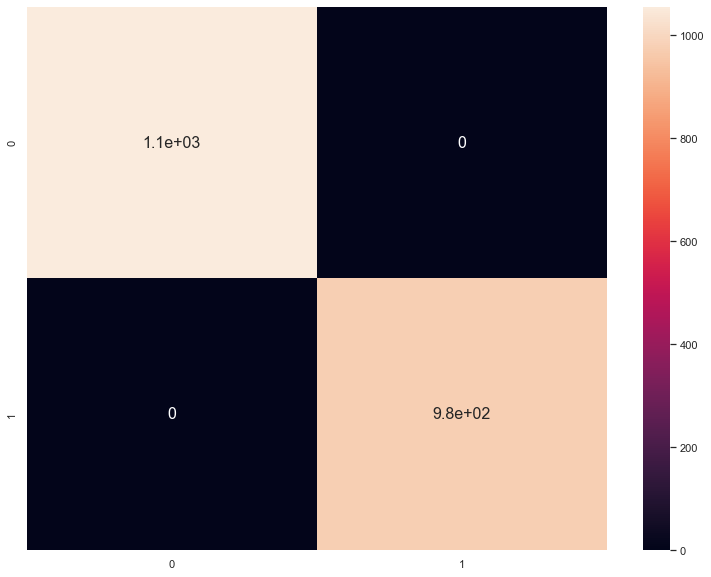

In [37]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,annot_kws={"size": 16})

In [48]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/invasion.csv")
data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [49]:
X_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/operative_information.csv")
X_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [50]:
transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}
y_train = data['class'].map(transport)
X_train = data.drop(columns=["class"])


In [51]:
params = {
    "n_estimators": range(10, 51, 10),
    "max_depth": range(1, 12, 2),
    "min_samples_leaf": range(1, 8),
    "min_samples_split": range(2, 10, 2)
}

clf_rf = RandomForestClassifier(random_state=0)
grid_search_cv = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1, verbose=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)},
             verbose=3)

In [52]:
clf = grid_search_cv.best_estimator_

In [56]:
pred = clf.predict(X_test)
c = Counter(pred)


In [57]:
c

Counter({1: 675, 0: 595, 2: 230})

In [58]:
clf.feature_importances_

array([0.08272264, 0.12437216, 0.17144063, 0.36380346, 0.        ,
       0.25766112])

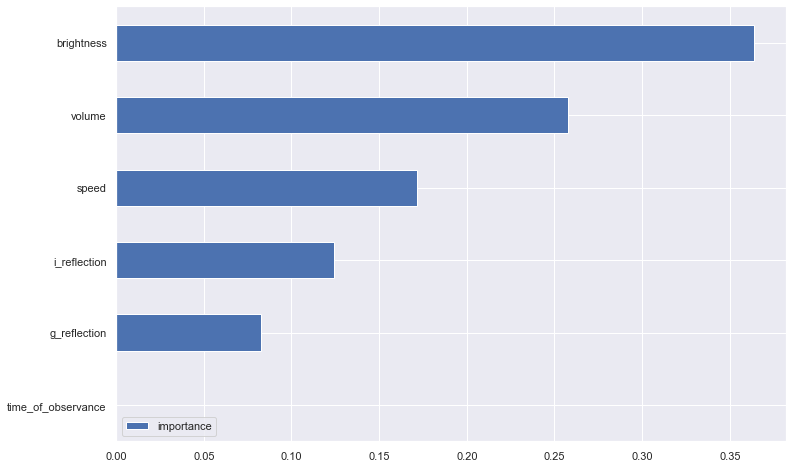

In [59]:

imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
None

In [64]:
imp.sort_values("importance", ascending=False)

,importance
brightness,0.363803
volume,0.257661
speed,0.171441
i_reflection,0.124372
g_reflection,0.082723
time_of_observance,0.000000


In [70]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv")
data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [71]:
X_train = data.drop(columns="dangerous")
y_train = data.dangerous
X_train.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo
0,169.1,138.0,22.3212,0.706285,0,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1


In [72]:
params = {
    "n_estimators": range(10, 51, 10),
    "max_depth": range(1, 12, 3),
    # "min_samples_leaf": range(1, 8),
    # "min_samples_split": range(2, 10, 2)
}

clf_rf = RandomForestClassifier(random_state=0)
grid_search_cv = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1, verbose=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 3),
                         'n_estimators': range(10, 51, 10)},
             verbose=3)

In [73]:
clf = grid_search_cv.best_estimator_

<AxesSubplot:>

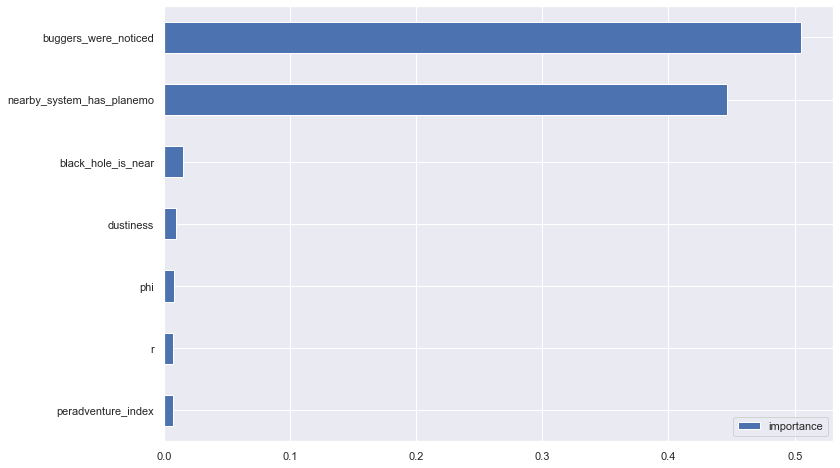

In [74]:

imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))